<center>

# <font size="6" color="darkblue">Trabalho Laboratorial 2</font>

<br><br>

## <font size="4" color="black">Instituto Superior de Engenharia de Lisboa</font>

### Aprendizagem Automática

#### Docente: G. Marques

<br>

#### Realizado por:

<p style="text-align: center;"><font size="3">Belarmino Rafael Sacate nº: 52057</font></p>

<p style="text-align: center;"><font size="3">Miguel Ferreira nº: 51878</font></p>

<br><br>

#### Data: 12 de Dezembro de 2025

<br><br><br>

</center>

---
# Introducao

---
# Imports

In [1]:
import pickle
import numpy as np

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re

---
# Leitura do dataset

In [2]:
fn ="imdbFull.p"
D = pickle.load(open(fn , 'rb'))
D.keys()

dict_keys(['data', 'target', 'DESCR'])

In [3]:
Docs = D.data
y = D.target

---
# Leitura do Docs a bruto(sem filtragem)

Numa primeira fase, recorremos a funcao TfidfVectorizer() sem parametros de filtragem para podermos perceber com que tipo de texto estamos a tratar, para depois conseguirmos identificar que tipo de filtragens poderao ser implementadas.

In [4]:
tfidf = TfidfVectorizer().fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

101895


aqui podemos observar que temos cerca de 101895 tonkens, dos quais temos:


- Elementos que como underscores; 

- caracteres numericos, entre outros;

Estes serao retirados no processo de filtragem, que sera essencial para a limpeza do documento reduzindo o tamanho do mesmo e selecionando somente informacoes mais relevantes.

In [5]:
tokens[1200:1500]

array(['6200', '62229249', '623', '624', '63', '637', '63rd', '64', '65',
       '651', '65m', '65mm', '66', '660', '6600f', '666', '66er', '66p',
       '66th', '67', '6723', '678', '67th', '68', '68th', '69', '69ing',
       '69p', '69th', '6am', '6b', '6f', '6ft', '6hours', '6k', '6m',
       '6million', '6pm', '6th', '6wks', '6yo', '6yrs', '70', '700',
       '7000', '70000', '700k', '701', '70369862', '707', '70ies', '70km',
       '70m', '70mm', '70p', '70s', '70th', '70õs', '71', '710', '713',
       '72', '720', '727', '729', '72nd', '73', '7300', '735', '737',
       '73min', '74', '740', '740il', '747', '747s', '74sooner', '74th',
       '75', '750', '75054', '757', '75c', '75m', '75min', '76', '7600',
       '762', '767', '77', '775', '78', '788', '78rpm', '79', '79th',
       '7c', '7days', '7even', '7eventy', '7ft', '7ish', '7m', '7million',
       '7mm', '7s', '7th', '7½', '7½th', '80', '800', '8000', '802',
       '80ies', '80ish', '80min', '80s', '80yr', '81', '810', '8

Exemplo de doc antes da limpeza, elementos que como tags html que sao desnecessarios no nosso caso pois os estao a ocupar espaco.

In [6]:
d = Docs[0]
d

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

---
# Limpeza dos Docs

Para a limpeza dos dados foi efectuada em 2 etapas:

- Primeira Etapa

    Substituicao de tags html por espacos vazios e


    na selecao de somente caracteres afabeticos, e acentos nas linguas latinas


- Segunda Etapa

    uso da funcao TfidfVectorizer para selecionar palavras que ocorrem no minimo 5 vezes entre os Docs e que tenham 4 ou mais cararacteres, eliminando assim casos como por exemplo: "the, a" etc etc

In [7]:
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

In [8]:
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

35205


Apos, a limpeza dos docs podemos notar uma dimuicao consideravel saimos de 101895 tokens para 
35205

display dos 100 primeiros tokens apos a limpeza e filtragem

In [9]:
tokens[:100]

array(['aaargh', 'aaliyah', 'aames', 'aamir', 'aankhen', 'aapke',
       'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning',
       'abandonment', 'abandons', 'abba', 'abbas', 'abbey', 'abbie',
       'abbot', 'abbott', 'abbreviated', 'abby', 'abdomen', 'abduct',
       'abducted', 'abducting', 'abduction', 'abductions', 'abductor',
       'abducts', 'abdul', 'abel', 'aberration', 'aberrations', 'abetted',
       'abhay', 'abhishek', 'abhorrent', 'abhors', 'abide', 'abiding',
       'abigail', 'abilities', 'ability', 'abit', 'abject', 'ablaze',
       'able', 'ably', 'abner', 'abnormal', 'abnormally', 'aboard',
       'abode', 'abolished', 'abominable', 'abominably', 'abomination',
       'abominations', 'aboriginal', 'aboriginals', 'aborigine',
       'aborigines', 'abort', 'aborted', 'abortion', 'abortions',
       'abortive', 'abound', 'abounds', 'about', 'above', 'abraham',
       'abrahams', 'abrams', 'abrasive', 'abre', 'abridged', 'abril',
       'abroad', 'abrupt

display do mesmo docs previamente ilustrado, mas desta vez limpo.

In [10]:
d = Docs[0]
d

'Zero Day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty '

Apos a limpeza dos dados, foi feita a reducao de tokens com certa similaridade a um so token recorrendo ao PorterStemmer, consigos reduzir ainda mais os tokens saindo de 35205 para 30954

---
# Stemmers

In [11]:
from nltk.stem import PorterStemmer
stemFunc = PorterStemmer()
voc = tfidf.get_feature_names_out()
voc2 = [stemFunc.stem(w) for w in voc]

In [12]:
from nltk.stem import PorterStemmer
stemFunc = PorterStemmer()
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]

tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs2)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

30954


In [13]:
print(tokens[:150])

['aaa' 'aaah' 'aaargh' 'aag' 'aah' 'aaliyah' 'aam' 'aamir' 'aankhen'
 'aapk' 'aardman' 'aargh' 'aaron' 'aatish' 'aback' 'abandon' 'abba'
 'abbey' 'abbi' 'abbot' 'abbott' 'abbrevi' 'abc' 'abdalla' 'abdic'
 'abdomen' 'abduct' 'abductor' 'abdul' 'abdullah' 'abe' 'abel'
 'abercrombi' 'aberdeen' 'abernathi' 'abernethi' 'aberr' 'abet' 'abhay'
 'abhi' 'abhishek' 'abhor' 'abhorr' 'abi' 'abid' 'abigail' 'abil' 'abit'
 'abject' 'abl' 'ablaz' 'abli' 'abner' 'abnorm' 'abo' 'aboard' 'abod'
 'abolish' 'abolit' 'abolitionist' 'abomin' 'aborigin' 'abort'
 'abortionist' 'abound' 'about' 'abov' 'abr' 'abraham' 'abram' 'abras'
 'abreast' 'abridg' 'abril' 'abroad' 'abrupt' 'abruptli' 'abscond'
 'absenc' 'absent' 'absente' 'absentia' 'absolut' 'absolutley' 'absolutli'
 'absolv' 'absorb' 'absorpt' 'abstain' 'abstin' 'abstract' 'absurd'
 'absurdist' 'absurdli' 'abu' 'abund' 'abundantli' 'abus' 'abut' 'abuzz'
 'abysm' 'abyss' 'acacia' 'acadami' 'academ' 'academi' 'academia'
 'acapulco' 'acced' 'acceler' 'acce

---
# Representacao tf-idf

In [14]:
x = tfidf.transform(Docs2)
print(x.shape, type(x))

(50000, 30954) <class 'scipy.sparse._csr.csr_matrix'>


In [15]:
print(tokens[:100])

['aaa' 'aaah' 'aaargh' 'aag' 'aah' 'aaliyah' 'aam' 'aamir' 'aankhen'
 'aapk' 'aardman' 'aargh' 'aaron' 'aatish' 'aback' 'abandon' 'abba'
 'abbey' 'abbi' 'abbot' 'abbott' 'abbrevi' 'abc' 'abdalla' 'abdic'
 'abdomen' 'abduct' 'abductor' 'abdul' 'abdullah' 'abe' 'abel'
 'abercrombi' 'aberdeen' 'abernathi' 'abernethi' 'aberr' 'abet' 'abhay'
 'abhi' 'abhishek' 'abhor' 'abhorr' 'abi' 'abid' 'abigail' 'abil' 'abit'
 'abject' 'abl' 'ablaz' 'abli' 'abner' 'abnorm' 'abo' 'aboard' 'abod'
 'abolish' 'abolit' 'abolitionist' 'abomin' 'aborigin' 'abort'
 'abortionist' 'abound' 'about' 'abov' 'abr' 'abraham' 'abram' 'abras'
 'abreast' 'abridg' 'abril' 'abroad' 'abrupt' 'abruptli' 'abscond'
 'absenc' 'absent' 'absente' 'absentia' 'absolut' 'absolutley' 'absolutli'
 'absolv' 'absorb' 'absorpt' 'abstain' 'abstin' 'abstract' 'absurd'
 'absurdist' 'absurdli' 'abu' 'abund' 'abundantli' 'abus' 'abut' 'abuzz']


Organizacao das palavras em ordem crescente, tendo em conta a ordenacao do tfidf.

In [16]:
xM = np.max(x,axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

print das palavras que o modelo tfidx considera mais importantes.

In [17]:
print(voc[:100])

['pokemon', 'ghouli', 'dalmat', 'scanner', 'robot', 'uzumaki', 'doodlebop', 'bad', 'esperanto', 'cycl', 'critter', 'rodrigu', 'ernest', 'smallvil', 'nuke', 'sasquatch', 'wei', 'steve', 'lupin', 'tarzan', 'darkman', 'primari', 'zatoichi', 'woo', 'bye', 'colombo', 'shark', 'prot', 'kibbutz', 'farscap', 'wirey', 'shemp', 'fujimori', 'muppet', 'barney', 'akasha', 'gamera', 'columbo', 'joke', 'lennon', 'botch', 'woodburi', 'knott', 'brendan', 'weller', 'brynner', 'custer', 'rajni', 'hackenstein', 'wine', 'melt', 'naschi', 'ninja', 'gadget', 'dahmer', 'gruner', 'matrix', 'twelv', 'beller', 'othello', 'cypher', 'dariu', 'stepford', 'vestron', 'blah', 'duvivi', 'twister', 'hanzo', 'srk', 'pasteur', 'django', 'zizek', 'dev', 'marti', 'dean', 'fabian', 'beetl', 'moto', 'tibb', 'gein', 'speck', 'hallam', 'winfield', 'janean', 'marathon', 'biko', 'and', 'noriko', 'suck', 'skate', 'seagal', 'genova', 'worm', 'alvin', 'game', 'camp', 'killjoy', 'kronk', 'sherpa', 'vick']


print das palavras que o modelo tfidx considera menos importantes.

In [18]:
print(voc[-100:])

['gayatri', 'hiroshi', 'candidli', 'gazett', 'encamp', 'acced', 'beslon', 'suwa', 'vibrantli', 'takemitsu', 'citadel', 'lopsid', 'pintauro', 'domicil', 'pipsqueak', 'chessboard', 'motorcar', 'illusori', 'harrowingli', 'shukla', 'imposit', 'roadway', 'dykstra', 'greenland', 'wada', 'nagato', 'koizumi', 'asahina', 'traips', 'rancho', 'entreat', 'hesitantli', 'chokeslam', 'psychosomat', 'authori', 'rifleman', 'starkest', 'rateyourmus', 'awoken', 'bhatti', 'tokoro', 'megaphon', 'steamship', 'tradesmen', 'vala', 'funakoshi', 'fedor', 'shrubland', 'nassau', 'debauch', 'rueful', 'susten', 'popularis', 'accomod', 'mccowen', 'ardor', 'straightforwardli', 'zekeria', 'salesperson', 'cavalryman', 'sohrab', 'seydou', 'rowboat', 'purvey', 'perrier', 'unpleasantri', 'mahmoodzada', 'homayoun', 'ershadi', 'underpaid', 'prettifi', 'perfidi', 'undercard', 'gurind', 'choisi', 'turnout', 'zantara', 'readout', 'yammer', 'cartograph', 'bandekar', 'seminarian', 'pasternak', 'invocu', 'ddt', 'cavendish', 'arro

Como podemos notar existem palavras que foram muito reduzidas ao utilizarmos o PorterStemmer, e abaixo esta uma implmentacao da analise feita acima com as palavras norma

In [19]:
Docs = D.data
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names_out()
x = tfidf.transform(Docs)
xM = np.max(x, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

print das palavras que o modelo tfidx considera mais importantes (sem PorterStemmer)

In [20]:
print(voc[:100])

['pokemon', 'scanners', 'robot', 'ghoulies', 'cycle', 'lupin', 'ernest', 'doodlebops', 'dalmations', 'critters', 'rodrigues', 'gamera', 'steve', 'tarzan', 'darkman', 'smallville', 'prot', 'fujimori', 'wine', 'sasquatch', 'jokes', 'demons', 'xica', 'casper', 'zatoichi', 'colombo', 'farscape', 'lennon', 'akasha', 'barney', 'cypher', 'wirey', 'sucks', 'gadget', 'custer', 'primary', 'weller', 'speck', 'shemp', 'naschy', 'brynner', 'janeane', 'worms', 'noriko', 'match', 'hackenstein', 'woodbury', 'ants', 'shark', 'botched', 'zizek', 'priya', 'dean', 'othello', 'stepford', 'game', 'marty', 'khouri', 'ninja', 'blah', 'gruner', 'brendan', 'duvivier', 'hanzo', 'matrix', 'elvira', 'paulie', 'alvin', 'joan', 'muppet', 'chiba', 'darius', 'killjoy', 'tanner', 'nemesis', 'nuke', 'hallam', 'gein', 'leonora', 'karloff', 'lexi', 'fabian', 'beatles', 'oprah', 'sissy', 'dentist', 'pack', 'cream', 'tyrannosaurus', 'zombi', 'coop', 'twelve', 'flea', 'buddy', 'blob', 'azumi', 'keaton', 'karen', 'alaska', 'm

print das palavras que o modelo tfidx considera menos importantes (sem PorterStemmer)

In [21]:
print(voc[-100:])

['cineplex', 'denigrating', 'emotes', 'understudy', 'credo', 'vertical', 'astride', 'backfire', 'chaplinesque', 'kinship', 'goads', 'yokels', 'radiating', 'puncture', 'unsupervised', 'compounds', 'proletariat', 'eatery', 'perpetrating', 'firecracker', 'organically', 'everyway', 'elaborating', 'slavering', 'immunity', 'plucking', 'boating', 'alphaville', 'tacks', 'whelan', 'cataclysmic', 'gingerly', 'scuppered', 'brims', 'dinky', 'unerring', 'père', 'subtracted', 'bafflingly', 'britt', 'striding', 'assassinates', 'bluntness', 'relinquishing', 'basking', 'sprang', 'rigging', 'allocated', 'alloy', 'nyree', 'entanglements', 'confections', 'nouveau', 'unmentioned', 'emits', 'ulliel', 'imposition', 'mclaughlin', 'unarguably', 'cardinals', 'schemer', 'imbuing', 'sharpshooter', 'luncheon', 'pervasively', 'auspicious', 'clarifying', 'institutionalised', 'sylvain', 'obstruction', 'expensively', 'indicted', 'devising', 'manoeuvre', 'vexed', 'galadriel', 'scolded', 'chokeslam', 'inscribed', 'bally

O modelo tdfidf considera essas palavras menos importantes pois elas aparecem em muitas e muitas criticas

agora fazemos o contrario recorrendo ao inverse document frequency.


quao mais baixo for o idf mais for o valor deste termo mais vezes a palavra aparece.

As palavras abaixo sao as palavras que aparecem mais vezes independemente da critica ser boa ou ma.

In [22]:
idf = tfidf.idf_ 
idx = np.argsort(idf)
voc=[tokens[i] for i in idx]
print(voc[:100])

['this', 'that', 'with', 'movie', 'have', 'film', 'from', 'like', 'they', 'there', 'just', 'about', 'what', 'some', 'good', 'when', 'more', 'time', 'very', 'even', 'only', 'would', 'really', 'well', 'which', 'story', 'much', 'than', 'their', 'were', 'other', 'been', 'most', 'also', 'into', 'first', 'great', 'will', 'made', 'because', 'people', 'make', 'could', 'after', 'them', 'then', 'watch', 'think', 'movies', 'acting', 'seen', 'characters', 'many', 'being', 'never', 'plot', 'know', 'ever', 'best', 'character', 'where', 'little', 'over', 'better', 'films', 'life', 'does', 'love', 'still', 'your', 'here', 'something', 'these', 'while', 'should', 'scenes', 'such', 'through', 'scene', 'back', 'watching', 'those', 'thing', 'real', 'actors', 'before', 'another', 'doesn', 'years', 'though', 'director', 'makes', 'didn', 'work', 'actually', 'look', 'find', 'nothing', 'going', 'show']


---
# Classificacao e Regressao

In [96]:
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split


stemFunc = SnowballStemmer('english')

fn ="imdbFull.p"
D = pickle.load(open(fn , 'rb'))
D.keys()
Docs = D.data
nota = D.target

Docs1, Docs2, y1, y2 = train_test_split(Docs, nota, test_size=0.3, random_state=42, stratify=nota)

Docs1 = [doc.replace('<br />', ' ') for doc in Docs1]
Docs1 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs1]
Docs1 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs1]
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs1)
x1 = tfidf.transform(Docs1)

Docs2 = [doc.replace('<br />', ' ') for doc in Docs2]
Docs2 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs2]
x2 = tfidf.transform(Docs2)

In [97]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty = 'l2', max_iter = 1000, C = 1, tol = 1e-3)
dl.fit(x1, y1)
print(dl.score(x1, y1))
print(dl.score(x2, y2))

0.6266857142857143
0.424


In [98]:
w = dl.coef_[0]
idx = np.argsort(w)
voc = tfidf.get_feature_names_out()
voc2 = [voc[i] for i in idx]
print(voc2[:50])
print('\n','-'*100,'\n')
print(voc2[-50:])

['great', 'excel', 'best', 'quit', 'beauti', 'love', 'perfect', 'recommend', 'definit', 'enjoy', 'also', 'becom', 'nice', 'fantast', 'overal', 'heart', 'today', 'brilliant', 'twist', 'differ', 'certain', 'strang', 'good', 'well', 'although', 'favorit', 'alway', 'bring', 'perform', 'pretti', 'memor', 'still', 'young', 'play', 'impress', 'more', 'though', 'awesom', 'hilari', 'amaz', 'prison', 'earli', 'funniest', 'particular', 'give', 'both', 'superb', 'most', 'almost', 'georg']

 ---------------------------------------------------------------------------------------------------- 

['complet', 'camera', 'travesti', 'entir', 'paid', 'script', 'disgust', 'laughabl', 'actor', 'trash', 'inept', 'idiot', 'asham', 'annoy', 'warn', 'lame', 'fail', 'pathet', 'rubbish', 'suppos', 'cost', 'ridicul', 'dread', 'redeem', 'appal', 'offens', 'would', 'zero', 'crap', 'couldn', 'pain', 'whatsoev', 'money', 'minut', 'stupid', 'this', 'embarrass', 'ever', 'even', 'noth', 'insult', 'garbag', 'avoid', 'bore'

78


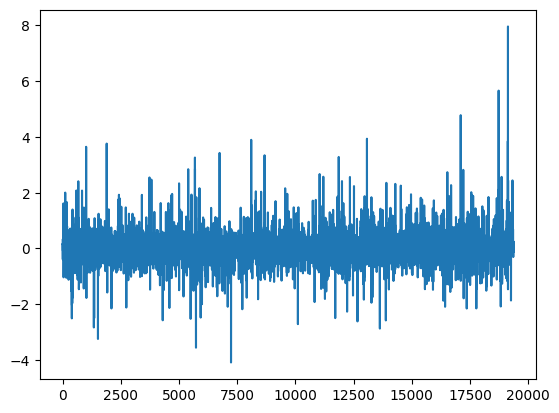

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(w)
print(np.sum(np.abs(w) <= 1e-3))

### Lasso

In [ ]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty = 'l1', solver='saga', max_iter = 1000, C = 0.10, tol = 1e-3)
dl.fit(x1, y1)
print(dl.score(x1, y1))
print(dl.score(x2, y2))

In [ ]:
w = dl.coef_[0]
idx = np.argsort(w)
print(np.sum(w!=0))
voc = tfidf.get_feature_names_out()
voc2 = [voc[i] for i in idx]
print(voc2[:50])
print('\n','-'*100,'\n')
print(voc2[-50:])

---
# Conclusao